In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade pip

     |████████████████████████████████| 1.5 MB 4.4 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.2.4
    Uninstalling pip-20.2.4:
      Successfully uninstalled pip-20.2.4
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

     |████████████████████████████████| 320.5 MB 13 kB/s  eta 0:00:012    |█████████▎                      | 92.4 MB 9.8 MB/s eta 0:00:24     |█████████████▌                  | 135.3 MB 8.9 MB/s eta 0:00:21     |███████████████████████▌        | 235.4 MB 11.3 MB/s eta 0:00:08 | 265.9 MB 3.5 MB/s eta 0:00:16
     |████████████████████████████████| 127 kB 20.5 MB/s eta 0:00:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 4.0 MB 16.3 MB/s eta 0:00:01     |██████████████████████████████  | 3.7 MB 16.3 MB/s eta 0:00:01
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     |████████████████████████████████| 1.0 MB 18.7 MB/s eta 0:00:01
     |████████████████████████████████| 10.6 MB 14.2 MB/s eta 0:00:01
     |████████████████████████████████| 114

https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

In [346]:
import sys
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from matplotlib import pyplot

In [423]:
""" Read the cross validation dataset """
cross_val_data = pd.read_csv ('For_10_Fold_Cross_Validation.csv')

In [424]:
""" For training the classifier define the features and class attribute """

X_Train = cross_val_data.drop('Class', axis = 1)

y_train = cross_val_data['Class']

In [425]:
X_Train.shape


(9690, 2304)

In [426]:
""" Scale the data """
sc = StandardScaler()
X_train = sc.fit_transform(X_Train)

In [427]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [428]:
print(dummy_y)
print(encoded_Y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
[4 4 8 ... 6 2 0]


Single hidden layers with relu activation function using 10-fold cross validation on original Training dataset

In [353]:
""" One hidden layer """

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=2304, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [354]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=50, verbose=0)

In [355]:
kfold = KFold(n_splits=10, shuffle=True)

In [356]:
results = cross_val_score(estimator,X_train, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 93.21% (1.36%)


Two hidden layers with relu activation function using 10-fold cross validation on original Training dataset

In [357]:
""" Two hidden layers relu"""

def baseline_model2():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=2304, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [358]:
estimator2 = KerasClassifier(build_fn=baseline_model2, epochs=200, batch_size=50, verbose=0)

In [359]:
results2 = cross_val_score(estimator2,X_train, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results2.mean()*100, results2.std()*100))

Baseline: 93.23% (1.09%)


Five hidden layers with relu activation function using 10-fold cross validation on original Training dataset

In [360]:
""" Five hidden layers relu"""

def baseline_model3():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=2304, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [361]:
estimator3 = KerasClassifier(build_fn=baseline_model3, epochs=200, batch_size=50, verbose=0)

In [362]:
results3 = cross_val_score(estimator3,X_train, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results3.mean()*100, results3.std()*100))

Baseline: 92.60% (1.18%)


Single hidden layers with sigmoid activation function using 10-fold cross validation on original Training dataset

In [363]:
""" One hidden layer Sigmoid """

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=2304, activation='sigmoid'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [364]:
estimators1 = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=50, verbose=0)

In [365]:
resultss1 = cross_val_score(estimators1,X_train, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (resultss1.mean()*100, resultss1.std()*100))

Baseline: 92.75% (1.01%)


Multiple hidden layers with sigmoid activation function using 10-fold cross validation on original Training dataset

In [366]:
""" Two hidden layers Sigmoid """

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=2304, activation='sigmoid'))
    model.add(Dense(8, activation='sigmoid'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [367]:
estimators2 = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=50, verbose=0)

In [368]:
resultss2 = cross_val_score(estimators2,X_train, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (resultss2.mean()*100, resultss2.std()*100))

Baseline: 91.79% (1.65%)


In [369]:
""" Two hidden layers Sigmoid & relu """

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=2304, activation='sigmoid'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [370]:
estimators3 = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=50, verbose=0)

In [371]:
resultss3 = cross_val_score(estimators3,X_train, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (resultss3.mean()*100, resultss3.std()*100))

Baseline: 93.04% (0.96%)


In [402]:
""" Two hidden layers Sigmoid & relu with regularisation """

def baseline_model_R():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=2304, activation='sigmoid', kernel_regularizer=l2(0.000001)))
    model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.000001)))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [403]:
estimatorR = KerasClassifier(build_fn=baseline_model_R, epochs=200, batch_size=50, verbose=0)

In [411]:
resultsR = cross_val_score(estimatorR,X_train, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (resultsR.mean()*100, resultsR.std()*100))

Baseline: 90.64% (2.64%)


In [429]:
X_train, X_test, y_train, y_test = train_test_split(
X_train,dummy_y, test_size=0.4, random_state=0)

In [430]:
print(y_test)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [415]:
resultss4= estimators3.fit(X_train, y_train, validation_split=0.3)
score = estimators3.predict(X_test, verbose=0)


In [433]:
resultstR= estimatorR.fit(X_train, y_train, validation_split=0.3)
scoretR = estimatorR.predict(X_test, verbose=0)

In [431]:
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

4

Classification report for classifier <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f07d81d3b50>:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       223
           1       0.89      0.75      0.81        88
           2       0.91      0.86      0.89       786
           3       0.79      0.84      0.81       114
           4       0.91      0.89      0.90       901
           5       0.93      0.91      0.92        93
           6       0.84      0.84      0.84       152
           7       0.80      0.96      0.87       533
           8       0.93      0.91      0.92       897
           9       0.89      0.75      0.82        89

    accuracy                           0.89      3876
   macro avg       0.88      0.86      0.87      3876
weighted avg       0.89      0.89      0.89      3876


Confusion Matrix:
[[197   1   0   7   1   1   9   6   1   0]
 [  0  66   1   0   0   3   1  17   0   0]
 [  0   1

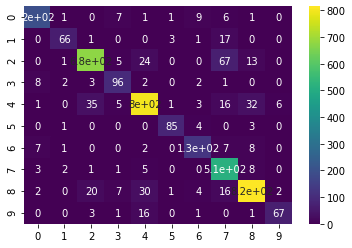

In [434]:
""" Confusion matrix of the predictions using the train-test split set with regularisation """

print("Classification report for classifier %s:\n%s\n"
      % (estimatorR, metrics.classification_report(rounded_labels, scoretR)))
cm = confusion_matrix(rounded_labels, scoretR)
print('Confusion Matrix:')
print(cm)
f = sns.heatmap(cm, annot=True, cmap = "viridis")

Classification report for classifier <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f07e1da8cd0>:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       223
           1       0.93      0.74      0.82        88
           2       0.94      0.93      0.93       786
           3       0.76      0.85      0.80       114
           4       0.91      0.91      0.91       901
           5       0.90      0.96      0.93        93
           6       0.75      0.92      0.83       152
           7       0.87      0.94      0.91       533
           8       0.93      0.91      0.92       897
           9       0.86      0.72      0.79        89

    accuracy                           0.90      3876
   macro avg       0.88      0.87      0.87      3876
weighted avg       0.91      0.90      0.90      3876


Confusion Matrix:
[[187   0   0  16   1   1  11   1   2   4]
 [  0  65   0   5   0   0  18   0   0   0]
 [  0   2

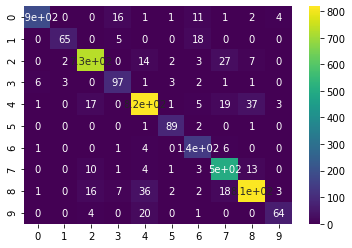

In [376]:
""" Confusion matrix of the predictions using the train-test split set """

print("Classification report for classifier %s:\n%s\n"
      % (estimators3, metrics.classification_report(rounded_labels, score)))
cm = confusion_matrix(rounded_labels, score)
print('Confusion Matrix:')
print(cm)
f = sns.heatmap(cm, annot=True, cmap = "viridis")


Use the model to predict the unseen data (Test data set)

In [435]:
""" Read the test dataset """
Test = pd.read_csv ('Test_Dataset.csv')

In [436]:
""" For testing """

X_Test = Test.drop('Class', axis = 1)

y_test = Test['Class']

In [437]:
""" Scale the test data """
sc = StandardScaler()
X_Test = sc.fit_transform(X_Test)

In [438]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Y = encoder.transform(y_test )
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(encoded_Y)

In [381]:
unseen_predictions = estimators3.predict(X_Test, verbose=0)

In [439]:
unseen_predictions_R = estimatorR.predict(X_Test, verbose=0)  

In [440]:
rounded_labels_unseen=np.argmax(dummy_y_test, axis=1)
rounded_labels_unseen[1]

6

Classification report for classifier <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f07d81d3b50>:
              precision    recall  f1-score   support

           0       0.94      0.69      0.80       150
           1       0.97      0.48      0.64        60
           2       0.80      0.63      0.71       660
           3       0.66      0.97      0.79        90
           4       0.78      0.82      0.80       720
           5       0.91      0.50      0.65        60
           6       0.82      0.84      0.83        90
           7       0.73      0.94      0.82       450
           8       0.87      0.91      0.89       750
           9       0.74      0.62      0.67        60

    accuracy                           0.80      3090
   macro avg       0.82      0.74      0.76      3090
weighted avg       0.81      0.80      0.80      3090


Confusion Matrix:
[[104   0   2  30   1   0   9   3   1   0]
 [  0  29   0   0   0   1   0  30   0   0]
 [  1   0

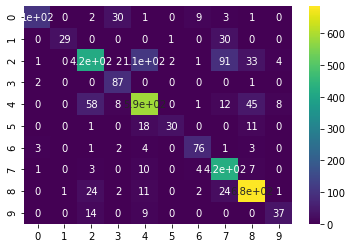

In [450]:
""" Confusion matrix of the predictions using the unseen test data set with regularisation """

print("Classification report for classifier %s:\n%s\n"
      % (estimatorR, metrics.classification_report(rounded_labels_unseen, unseen_predictions_R)))
cm1 = confusion_matrix(rounded_labels_unseen, unseen_predictions_R)
print('Confusion Matrix:')
print(cm1)
f = sns.heatmap(cm1, annot=True, cmap = "viridis")

Classification report for classifier <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f07e1da8cd0>:
              precision    recall  f1-score   support

           0       0.99      0.61      0.76       150
           1       0.61      0.55      0.58        60
           2       0.86      0.76      0.81       660
           3       0.69      0.91      0.79        90
           4       0.85      0.88      0.86       720
           5       0.79      0.52      0.63        60
           6       0.57      0.80      0.67        90
           7       0.75      0.93      0.83       450
           8       0.90      0.87      0.89       750
           9       0.71      0.50      0.59        60

    accuracy                           0.82      3090
   macro avg       0.77      0.73      0.74      3090
weighted avg       0.83      0.82      0.82      3090


Confusion Matrix:
[[ 92  12   1  28   0   0   9   4   3   1]
 [  0  33   0   0   0   0  27   0   0   0]
 [  0   3

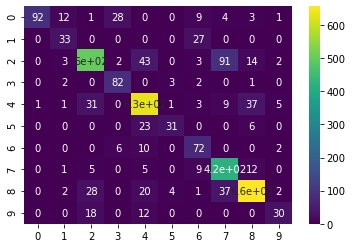

In [383]:
""" Confusion matrix of the predictions using the unseen test data set """

print("Classification report for classifier %s:\n%s\n"
      % (estimators3, metrics.classification_report(rounded_labels_unseen, unseen_predictions)))
cm = confusion_matrix(rounded_labels_unseen, unseen_predictions)
print('Confusion Matrix:')
print(cm)
f = sns.heatmap(cm, annot=True, cmap = "viridis")

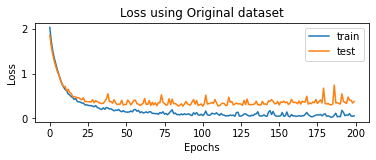

In [384]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss using Original dataset')
pyplot.plot(resultss4.history['loss'], label='train')
pyplot.plot(resultss4.history['val_loss'], label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

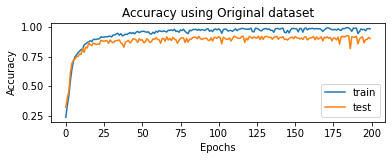

In [385]:
# plot accuracy during training
pyplot.subplot(211)
pyplot.title('Accuracy using Original dataset')
pyplot.plot(resultss4.history['accuracy'], label='train')
pyplot.plot(resultss4.history['val_accuracy'], label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.show()

Original dataset with regularisation to reduce overfitting 

In [386]:
""" Two hidden layers Sigmoid & relu with Regularisation"""

def baseline_model_Reg():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=2304, activation='sigmoid', kernel_regularizer=l2(0.000001)))
    model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.000001)))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [387]:
estimator_Reg = KerasClassifier(build_fn=baseline_model_Reg, epochs=200, batch_size=50, verbose=0)

In [388]:
results_Reg= estimator_Reg.fit(X_train, y_train, validation_split=0.3)
unseen_predictions_Reg = estimator_Reg.predict(X_Test, verbose=0)

In [389]:
rounded_labels_unseen_Reg=np.argmax(dummy_y_test, axis=1)
rounded_labels_unseen_Reg[1]

6

Classification report for classifier <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f079c51b130>:
              precision    recall  f1-score   support

           0       0.68      0.73      0.70       150
           1       0.72      0.55      0.62        60
           2       0.84      0.84      0.84       660
           3       0.76      0.64      0.70        90
           4       0.81      0.83      0.82       720
           5       0.75      0.50      0.60        60
           6       0.80      0.84      0.82        90
           7       0.78      0.97      0.86       450
           8       0.90      0.81      0.85       750
           9       0.47      0.28      0.35        60

    accuracy                           0.82      3090
   macro avg       0.75      0.70      0.72      3090
weighted avg       0.82      0.82      0.81      3090


Confusion Matrix:
[[109   3   0  15   2   4   6  10   1   0]
 [ 26  33   0   1   0   0   0   0   0   0]
 [  2   3

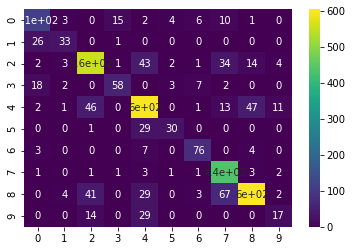

In [390]:
""" Confusion matrix of the predictions using the unseen test data set """

print("Classification report for classifier %s:\n%s\n"
      % (estimator_Reg , metrics.classification_report(rounded_labels_unseen_Reg, unseen_predictions_Reg)))
cm = confusion_matrix(rounded_labels_unseen_Reg, unseen_predictions_Reg)
print('Confusion Matrix:')
print(cm)
f = sns.heatmap(cm, annot=True, cmap = "viridis")

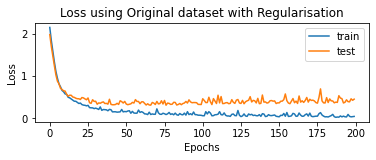

In [391]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss using Original dataset with Regularisation')
pyplot.plot(results_Reg.history['loss'], label='train')
pyplot.plot(results_Reg.history['val_loss'], label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

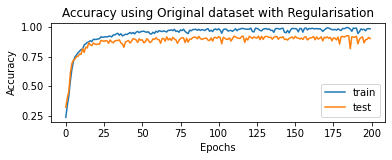

In [392]:
# plot accuracy during training
pyplot.subplot(211)
pyplot.title('Accuracy using Original dataset with Regularisation')
pyplot.plot(resultss4.history['accuracy'], label='train')
pyplot.plot(resultss4.history['val_accuracy'], label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.show()

Use the model for training and predicting with Train-Test-4000 dataset

In [461]:
""" Read the 4000 Train and Test datasets """
Train4000 = pd.read_csv ('Train_Dataset_4000.csv')
Test4000 = pd.read_csv ('Test_Dataset_4000.csv')

In [462]:
""" For training and testing """

X4000_Train = Train4000.drop('Class', axis = 1)
y4000_train = Train4000 ['Class']

X4000_Test = Test4000.drop('Class', axis = 1)
y4000_test = Test4000['Class']

In [463]:
""" Scale the test data """
sc = StandardScaler()
X4000_train = sc.fit_transform(X4000_Train)
X4000_test = sc.fit_transform(X4000_Test)


In [464]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y4000_train)
encoded_Y4000 = encoder.transform(y4000_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy4000_y = np_utils.to_categorical(encoded_Y4000)

encoder.fit(y4000_test)
encoded_Y4000_test = encoder.transform(y4000_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy4000_y_test = np_utils.to_categorical(encoded_Y4000_test)

In [394]:
print(dummy4000_y_test)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [90]:
results_4000= estimators3.fit(X4000_train, dummy4000_y , validation_split=0.3)
prediction_4000 = estimators3.predict(X4000_test, verbose=0)

In [465]:
results_4000_R= estimatorR.fit(X4000_train, dummy4000_y , validation_split=0.3)
prediction_4000_R= estimatorR.predict(X4000_test, verbose=0)

In [393]:
print(prediction_4000 )

[8 4 4 ... 6 8 2]


In [466]:
rounded_labels_4000=np.argmax(dummy4000_y_test, axis=1)
rounded_labels_4000[1]

6

Classification report for classifier <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f07d81d3b50>:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       376
           1       0.76      0.86      0.81       145
           2       0.89      0.94      0.92      1474
           3       0.71      0.76      0.74       202
           4       0.87      0.89      0.88      1634
           5       0.86      0.75      0.80       146
           6       0.77      0.77      0.77       242
           7       0.93      0.95      0.94      1036
           8       0.94      0.89      0.91      1691
           9       0.89      0.57      0.69       144

    accuracy                           0.89      7090
   macro avg       0.85      0.82      0.83      7090
weighted avg       0.89      0.89      0.89      7090


Confusion Matrix:
[[ 304    5    1   14    6    1   38    4    3    0]
 [   2  124    4    2    0    8    4    0 

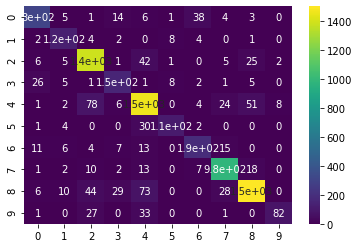

In [467]:
""" Confusion matrix of the predictions using the 4000 train test data set with regularisation"""

print("Classification report for classifier %s:\n%s\n"
      % (estimatorR, metrics.classification_report(rounded_labels_4000, prediction_4000_R)))
cm = confusion_matrix(rounded_labels_4000, prediction_4000_R)
print('Confusion Matrix:')
print(cm)
f = sns.heatmap(cm, annot=True, cmap = "viridis")

Classification report for classifier <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f07d420ae20>:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       376
           1       0.76      0.92      0.83       145
           2       0.92      0.92      0.92      1474
           3       0.74      0.73      0.74       202
           4       0.87      0.88      0.88      1634
           5       0.87      0.71      0.78       146
           6       0.75      0.79      0.77       242
           7       0.91      0.94      0.93      1036
           8       0.90      0.91      0.91      1691
           9       0.83      0.67      0.74       144

    accuracy                           0.89      7090
   macro avg       0.85      0.83      0.83      7090
weighted avg       0.89      0.89      0.89      7090


Confusion Matrix:
[[ 301    2    1   19    8    2   39    1    2    1]
 [   1  133    1    1    0    7    1    0 

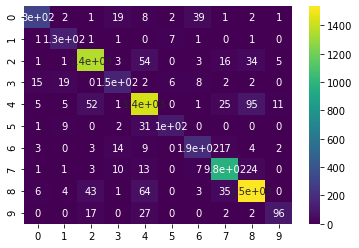

In [92]:
""" Confusion matrix of the predictions using the 4000 train test data set """

print("Classification report for classifier %s:\n%s\n"
      % (estimators3, metrics.classification_report(rounded_labels_4000, prediction_4000)))
cm = confusion_matrix(rounded_labels_4000, prediction_4000)
print('Confusion Matrix:')
print(cm)
f = sns.heatmap(cm, annot=True, cmap = "viridis")

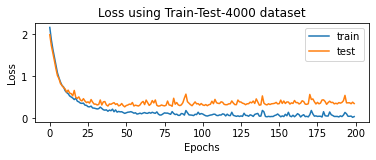

In [265]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss using Train-Test-4000 dataset')
pyplot.plot(results_4000.history['loss'], label='train')
pyplot.plot(results_4000.history['val_loss'], label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

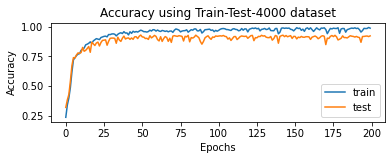

In [270]:
# plot accuracy during training
pyplot.subplot(211)
pyplot.title('Accuracy using Train-Test-4000 dataset')
pyplot.plot(results_4000.history['accuracy'], label='train')
pyplot.plot(results_4000.history['val_accuracy'], label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.show()

Use the model for training and predicting with Train-Test-9000 dataset

In [457]:
""" Read the 9000 Train and Test datasets """
Train9000 = pd.read_csv ('Train_Dataset_9000.csv')
Test9000 = pd.read_csv ('Test_Dataset_9000.csv')

In [458]:
""" For training and testing """

X9000_Train = Train9000.drop('Class', axis = 1)
y9000_train = Train9000 ['Class']

X9000_Test = Test9000.drop('Class', axis = 1)
y9000_test = Test9000['Class']

In [459]:
""" Scale the test data """
sc = StandardScaler()
X9000_train = sc.fit_transform(X9000_Train)
X9000_test = sc.fit_transform(X9000_Test)

In [460]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y9000_train)
encoded_Y9000 = encoder.transform(y9000_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy9000_y = np_utils.to_categorical(encoded_Y9000)

encoder.fit(y9000_test)
encoded_Y9000_test = encoder.transform(y9000_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy9000_y_test = np_utils.to_categorical(encoded_Y9000_test)

In [98]:
results_9000= estimators3.fit(X9000_train, dummy9000_y , validation_split=0.3)
prediction_9000 = estimators3.predict(X9000_test, verbose=0)

In [455]:
results_9000_R= estimatorR.fit(X9000_train, dummy9000_y , validation_split=0.3)
prediction_9000_R = estimatorR.predict(X9000_test, verbose=0)

In [99]:
rounded_labels_9000=np.argmax(dummy9000_y_test, axis=1)
rounded_labels_9000[1]

4

Classification report for classifier <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f07d81d3b50>:
              precision    recall  f1-score   support

           0       0.55      0.78      0.64       508
           1       0.14      0.06      0.08       195
           2       0.77      0.89      0.82      1838
           3       0.47      0.41      0.44       252
           4       0.76      0.72      0.74      2063
           5       0.57      0.74      0.65       219
           6       0.23      0.08      0.12       336
           7       0.77      0.77      0.77      1308
           8       0.73      0.74      0.73      2089
           9       0.27      0.15      0.19       192

    accuracy                           0.71      9000
   macro avg       0.53      0.53      0.52      9000
weighted avg       0.69      0.71      0.69      9000


Confusion Matrix:
[[ 396    8    8   25    3   25   26   14    1    2]
 [  50   11    7    7    0   69   42    0 

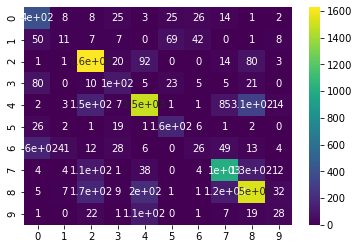

In [456]:
""" Confusion matrix of the predictions using the 9000 train test data set with Regularisation"""

print("Classification report for classifier %s:\n%s\n"
      % (estimatorR, metrics.classification_report(rounded_labels_9000, prediction_9000_R)))
cm = confusion_matrix(rounded_labels_9000, prediction_9000_R)
print('Confusion Matrix:')
print(cm)
f = sns.heatmap(cm, annot=True, cmap = "viridis")

Classification report for classifier <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f07d420ae20>:
              precision    recall  f1-score   support

           0       0.84      0.70      0.77       508
           1       0.40      0.16      0.23       195
           2       0.77      0.68      0.72      1838
           3       0.42      0.27      0.33       252
           4       0.72      0.72      0.72      2063
           5       0.39      0.70      0.50       219
           6       0.51      0.68      0.58       336
           7       0.81      0.72      0.76      1308
           8       0.62      0.77      0.69      2089
           9       0.32      0.15      0.20       192

    accuracy                           0.68      9000
   macro avg       0.58      0.55      0.55      9000
weighted avg       0.69      0.68      0.68      9000


Confusion Matrix:
[[ 358    0    0    2   11   21   77   14   14   11]
 [   6   31    0    1    1   94   39   14 

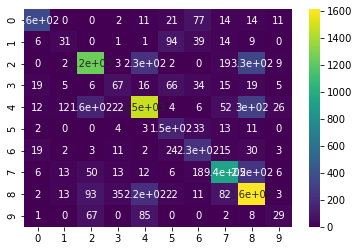

In [100]:
""" Confusion matrix of the predictions using the 9000 train test data set """

print("Classification report for classifier %s:\n%s\n"
      % (estimators3, metrics.classification_report(rounded_labels_9000, prediction_9000)))
cm = confusion_matrix(rounded_labels_9000, prediction_9000)
print('Confusion Matrix:')
print(cm)
f = sns.heatmap(cm, annot=True, cmap = "viridis")

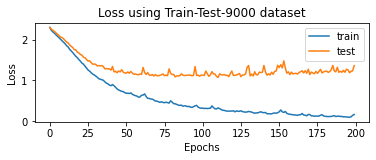

In [264]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss using Train-Test-9000 dataset')
pyplot.plot(results_9000.history['loss'], label='train')
pyplot.plot(results_9000.history['val_loss'], label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

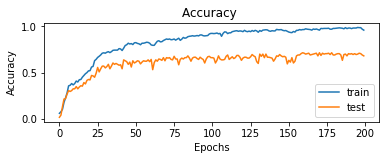

In [263]:
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy ')
pyplot.plot(results_9000.history['accuracy'], label='train')
pyplot.plot(results_9000.history['val_accuracy'], label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.show()

Use the model for training and predicting with the exploratory dataset

In [112]:
""" Read the Exploratory Train and Test datasets """
Exploratory_Train = pd.read_csv ('Top_20_Exploratory_random.csv')
Exploratory_Test = pd.read_csv ('Test_Exploratory_random.csv')

In [116]:
""" For training and testing """

XExp_Train = Exploratory_Train.drop('Class', axis = 1)
yExp_train = Exploratory_Train ['Class']

XExp_Test = Exploratory_Test.drop('Class', axis = 1)
yExp_test = Exploratory_Test['Class']

In [120]:
XExp_Train.shape
XExp_Test.shape

(3090, 119)

In [117]:
""" Scale the test data """
sc = StandardScaler()
XExp_train = sc.fit_transform(XExp_Train)
XExp_test = sc.fit_transform(XExp_Test)

In [118]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(yExp_train)
encoded_YExp = encoder.transform(yExp_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummyExp_y = np_utils.to_categorical(encoded_YExp)

encoder.fit(yExp_test)
encoded_YExp_test = encoder.transform(yExp_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummyExp_y_test = np_utils.to_categorical(encoded_YExp_test)

In [121]:
""" Two hidden layers Sigmoid & relu """

def Exp_baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=119, activation='sigmoid'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [122]:
estimatorExp = KerasClassifier(build_fn=Exp_baseline_model, epochs=200, batch_size=50, verbose=0)

In [123]:
results_Exp= estimatorExp.fit(XExp_train , dummyExp_y , validation_split=0.3)
prediction_Exp = estimatorExp.predict(XExp_test, verbose=0)

In [124]:
rounded_labels_Exp=np.argmax(dummyExp_y_test, axis=1)
rounded_labels_Exp[1]

2

Classification report for classifier <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f07d420ae20>:
              precision    recall  f1-score   support

           0       0.83      0.73      0.77       150
           1       0.78      0.48      0.60        60
           2       0.91      0.83      0.87       660
           3       0.69      0.24      0.36        90
           4       0.87      0.87      0.87       720
           5       0.48      0.48      0.48        60
           6       0.47      0.76      0.58        90
           7       0.89      0.96      0.92       450
           8       0.87      0.94      0.91       750
           9       0.62      0.75      0.68        60

    accuracy                           0.84      3090
   macro avg       0.74      0.70      0.70      3090
weighted avg       0.85      0.84      0.84      3090


Confusion Matrix:
[[109   4   1   2   0   1  29   0   1   3]
 [  0  29   1   0   0   0  30   0   0   0]
 [  1   3

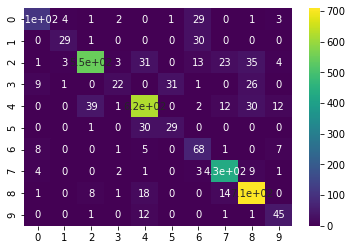

In [125]:
""" Confusion matrix of the predictions using the exploratory test data set """

print("Classification report for classifier %s:\n%s\n"
      % (estimators3, metrics.classification_report(rounded_labels_Exp, prediction_Exp)))
cm = confusion_matrix(rounded_labels_Exp, prediction_Exp)
print('Confusion Matrix:')
print(cm)
f = sns.heatmap(cm, annot=True, cmap = "viridis")

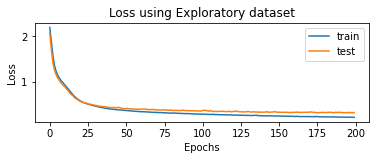

In [259]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss using Exploratory dataset')
pyplot.plot(results_Exp.history['loss'], label='train')
pyplot.plot(results_Exp.history['val_loss'], label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

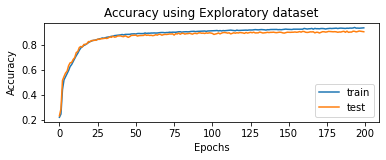

In [260]:
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy using Exploratory dataset')
pyplot.plot(results_Exp.history['accuracy'], label='train')
pyplot.plot(results_Exp.history['val_accuracy'], label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.show()

L2 regularisation to decrease overfitting

In [230]:
""" Two hidden layers Sigmoid & relu with L2 regularization """

def Exp_baseline_model_Reg():
    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=119, activation='sigmoid', kernel_regularizer=l2(0.00001)))
    model.add(Dense(15, activation='relu', kernel_regularizer=l2(0.00001)))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [231]:
estimatorExpReg = KerasClassifier(build_fn=Exp_baseline_model_Reg, epochs=200, batch_size=50, verbose=0)

In [232]:
results_Exp_Reg= estimatorExpReg.fit(XExp_train , dummyExp_y , validation_split=0.3)
prediction_Exp_Reg = estimatorExpReg.predict(XExp_test, verbose=0)

In [233]:
rounded_labels_Reg=np.argmax(dummyExp_y_test, axis=1)
rounded_labels_Reg[1]

2

Classification report for classifier <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f07c450b040>:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       150
           1       0.73      0.63      0.68        60
           2       0.94      0.86      0.90       660
           3       0.62      0.54      0.58        90
           4       0.88      0.90      0.89       720
           5       0.60      0.48      0.54        60
           6       0.69      0.77      0.73        90
           7       0.89      0.98      0.93       450
           8       0.93      0.96      0.94       750
           9       0.63      0.75      0.69        60

    accuracy                           0.88      3090
   macro avg       0.78      0.76      0.77      3090
weighted avg       0.88      0.88      0.88      3090


Confusion Matrix:
[[115   4   0  23   2   2   2   0   1   1]
 [  0  38   0   0   0   0  21   1   0   0]
 [  0   2

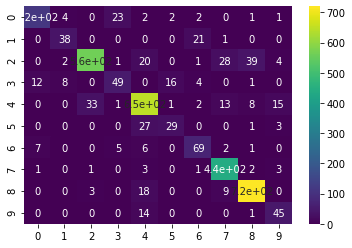

In [236]:
""" Confusion matrix of the predictions using the Exploratory data set with regularisation"""

print("Classification report for classifier %s:\n%s\n"
      % (estimatorExpReg, metrics.classification_report(rounded_labels_Reg, prediction_Exp_Reg)))
cm = confusion_matrix(rounded_labels_Reg, prediction_Exp_Reg)
print('Confusion Matrix:')
print(cm)
f = sns.heatmap(cm, annot=True, cmap = "viridis")

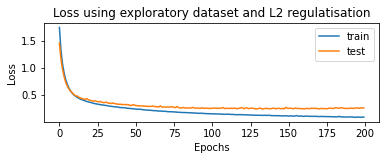

In [261]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss using exploratory dataset and L2 regulatisation')
pyplot.plot(results_Exp_Reg.history['loss'], label='train')
pyplot.plot(results_Exp_Reg.history['val_loss'], label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

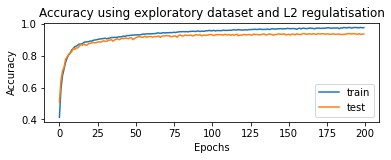

In [262]:
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy using exploratory dataset and L2 regulatisation')
pyplot.plot(results_Exp_Reg.history['accuracy'], label='train')
pyplot.plot(results_Exp_Reg.history['val_accuracy'], label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.show()

Comparison Graphs 

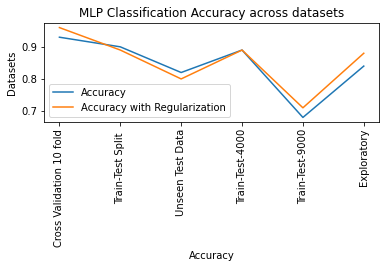

In [473]:
pyplot.subplot(212)
Datasets = ['Cross Validation 10 fold', 'Train-Test Split ', 'Unseen Test Data',
            'Train-Test-4000', 'Train-Test-9000', 'Exploratory']

Accuracy = [0.93, 0.9, 0.82, 0.89, 0.68,
         0.84]
Regularization = [0.96, 0.89, 0.80, 0.89, 0.71,
         0.88]
pyplot.title('MLP Classification Accuracy across datasets')

pyplot.plot(Datasets, Accuracy, label = 'Accuracy')
pyplot.plot(Datasets, Regularization, label ='Accuracy with Regularization')
pyplot.xticks(rotation=90)
pyplot.xlabel('Accuracy', )
pyplot.ylabel('Datasets')
pyplot.legend()
pyplot.show()